<a href="https://colab.research.google.com/github/blackkolly/IOT_LAB/blob/main/IOT_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

RSS Data (First 5 rows):
[[-32 -37 -72 -37]
 [-32 -36 -58 -38]
 [-32 -35 -59 -56]
 [-32 -37 -64 -55]
 [-32 -39 -57 -44]]

Position Data (First 5 rows):
[[1.09 9.4  1.6 ]
 [1.09 9.4  1.6 ]
 [1.09 9.4  1.6 ]
 [1.09 9.4  1.6 ]
 [1.09 9.4  1.6 ]]

Shapes of datasets after splitting:
Training RSS data (X_train): (456, 4)
Testing RSS data (X_test): (229, 4)
Training position data (y_train): (456, 3)
Testing position data (y_test): (229, 3)


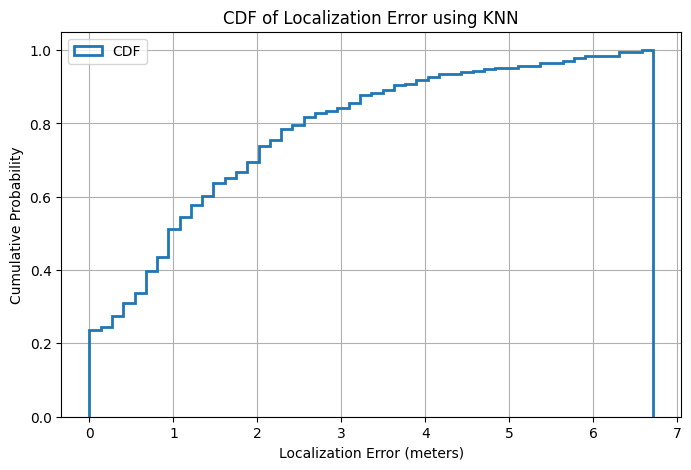


Mean localization error: 1.53 meters
Median localization error: 1.03 meters
[1.03387083e-01 1.57867736e+00 1.08591999e+00 3.26791983e+00
 1.42713777e+00 2.26398125e+00 3.87725562e+00 2.05780358e+00
 9.88489308e-01 4.99788844e-01 1.10103991e+00 0.00000000e+00
 1.08591999e+00 1.02335505e+00 1.73171078e+00 1.17836987e+00
 0.00000000e+00 2.12486339e+00 3.38000657e-01 1.02335505e+00
 7.51250809e-01 5.96236064e+00 3.86666667e-01 7.40945342e-01
 4.44089210e-16 2.74873708e-02 1.51180540e+00 1.25477754e+00
 3.86666667e-01 0.00000000e+00 1.27401378e+00 0.00000000e+00
 1.17836987e+00 4.18503286e+00 3.98599493e+00 7.67716672e-01
 0.00000000e+00 2.66452622e+00 7.63915353e-01 2.49553379e+00
 3.43268764e+00 9.51746932e-01 2.34840371e+00 2.22044605e-16
 1.44166956e+00 4.82828357e+00 2.06009709e+00 5.47851257e+00
 0.00000000e+00 8.89856418e-01 1.27401378e+00 1.03387083e-01
 1.02623909e+00 1.17836987e+00 1.44166956e+00 4.04206355e+00
 3.15735473e+00 1.86627674e+00 0.00000000e+00 7.98115837e-01
 2.38841

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Load data from .mat files
def load_data(rss_file, pos_file):
    """
    Load RSS and position data from .mat files.

    Parameters:
        rss_file (str): Path to the RSS data file.
        pos_file (str): Path to the position data file.

    Returns:
        rss_data (numpy.ndarray): RSS values.
        pos_data (numpy.ndarray): Position coordinates.
    """
    rss_data = scipy.io.loadmat(rss_file)['Mat_RSS']
    pos_data = scipy.io.loadmat(pos_file)['Mat_Pos']
    return rss_data, pos_data

# Display a few rows of RSS and position data
def inspect_data(rss_data, pos_data, num_rows=5):
    """
    Display the first few rows of RSS and position data.

    Parameters:
        rss_data (numpy.ndarray): RSS values.
        pos_data (numpy.ndarray): Position coordinates.
        num_rows (int): Number of rows to display.
    """
    print("RSS Data (First {} rows):".format(num_rows))
    print(rss_data[:num_rows])
    print("\nPosition Data (First {} rows):".format(num_rows))
    print(pos_data[:num_rows])

# Split data into training (2/3) and testing (1/3)
def split_data(rss_data, pos_data, test_size=1/3, random_state=42):
    """
    Split the dataset into training and testing sets.

    Parameters:
        rss_data (numpy.ndarray): RSS values.
        pos_data (numpy.ndarray): Position coordinates.
        test_size (float): Proportion of the dataset to include in the test split (default is 1/3).
        random_state (int): Seed for random number generation (default is 42).

    Returns:
        X_train, X_test, y_train, y_test: Training and testing splits for RSS and position data.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        rss_data, pos_data, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

# Train KNN model and predict positions
def train_and_predict(X_train, y_train, X_test, k=3):
    """
    Train a KNN model and predict positions for the test set.

    Parameters:
        X_train (numpy.ndarray): Training RSS values.
        y_train (numpy.ndarray): Training position coordinates.
        X_test (numpy.ndarray): Testing RSS values.
        k (int): Number of nearest neighbors (default is 3).

    Returns:
        y_pred (numpy.ndarray): Predicted position coordinates.
    """
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    return knn.predict(X_test)

# Calculate localization errors
def calculate_errors(y_true, y_pred):
    """
    Calculate the Euclidean distance between actual and predicted positions.
    """
    return np.linalg.norm(y_true - y_pred, axis=1)

# Plot CDF of localization errors
def plot_cdf(errors):
    """
    Plot the Cumulative Distribution Function (CDF) of localization errors.

    """
    plt.figure(figsize=(8, 5))
    plt.hist(errors, bins=50, density=True, cumulative=True, histtype='step', linewidth=2, label="CDF")
    plt.xlabel("Localization Error (meters)")
    plt.ylabel("Cumulative Probability")
    plt.title("CDF of Localization Error using KNN")
    plt.grid()
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load data
    rss_data, pos_data = load_data('/mnt/Mat_RSS.mat', '/mnt/Mat_Pos.mat')

    # Inspect the first few rows of RSS and position data
    inspect_data(rss_data, pos_data, num_rows=5)

    # Split data into training (2/3) and testing (1/3)
    X_train, X_test, y_train, y_test = split_data(rss_data, pos_data)

    # Print shapes of training and testing sets
    print("\nShapes of datasets after splitting:")
    print(f"Training RSS data (X_train): {X_train.shape}")
    print(f"Testing RSS data (X_test): {X_test.shape}")
    print(f"Training position data (y_train): {y_train.shape}")
    print(f"Testing position data (y_test): {y_test.shape}")

    # Predict positions using KNN
    y_pred = train_and_predict(X_train, y_train, X_test, k=3)

    # Calculate localization errors
    errors = calculate_errors(y_test, y_pred)

    # Plot CDF of errors
    plot_cdf(errors)

    # Print mean and median errors
    print(f"\nMean localization error: {np.mean(errors):.2f} meters")
    print(f"Median localization error: {np.median(errors):.2f} meters")
    print(errors)